# Example: fitting a waveform in the SXS catalog

### Import modules

In [1]:
from jaxqualin.qnmode import mode, mode_list
from jaxqualin.waveforms import get_waveform_SXS
from jaxqualin.fit import QNMFitVaryingStartingTime
from jaxqualin.plot import plot_amplitudes, plot_phases, plot_omega_free, plot_predicted_qnms

import numpy as np
import matplotlib.pyplot as plt

PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1


### Getting the SXS waveform

The waveform will be downloaded with the `sxs` package, if not already.
`retro` is `True` if $\vec{\chi}_{\rm rem}$ is parallel to the orbital angular momentum of the binary and `False` if it is anti-parallel.

In [2]:
SXSnum = "0305"
l = 2
m = 2

h, Mf, af, Lev = get_waveform_SXS(SXSnum, l, m)

Skipping download from 'https://data.black-holes.org/catalog.json' because local file is newer
Skipping download from 'https://data.black-holes.org/catalog.json' because local file is newer
Found the following files to load from the SXS catalog:
    SXS:BBH:0305v5/Lev6/rhOverM_Asymptotic_GeometricUnits_CoM.h5


Found the following files to load from the SXS catalog:
    SXS:BBH:0305v5/Lev6/metadata.json


In [3]:
print(af)

0.6920851868180025


### Case 1: Fit model with free QNMs (unfixed frequencies)

Here we will fit with three free QNMs ($N_{f} = 3$) and see if the resulting frequencies approach any of the QNMs we expect to find.
By default, the fit results are saved with `pickle` into `./.jaxqualin_cache/fits/`.
If `load_pickle` is `True`, the fitter will load the pickled result that matches `run_string_prefix` and the list of modes used.

In [4]:
t0_arr = np.linspace(0, 50, num = 501) # array of starting times to fit for
                                       # t0 = 0 is the peak of the strain
qnm_fixed_list = [] # list of QNMs with fixed frequencies in the fit model
run_string_prefix = f"SXS{SXSnum}_lm_{l}.{m}" # prefix of pickle file for saving the results
N_free = 3 # number of free modes to use

# fitter object
fitter = QNMFitVaryingStartingTime(
                            h, t0_arr, N_free = N_free,
                            qnm_fixed_list = qnm_fixed_list, load_pickle = True,
                            run_string_prefix = run_string_prefix)

In [5]:
# do fits, in series from lowest to highest starting time
# This takes a little longer to run the first time
fitter.do_fits()

Runname: SXS0305_lm_2.2, fitting for N_free = 3. Status:   0%|          | 0/501 [00:00<?, ?it/s]

In [6]:
# fitter results object
result = fitter.result_full

### Plotting the results

Different colored points trace out the frequency evolution of a free QNM from early to late $t_0$.

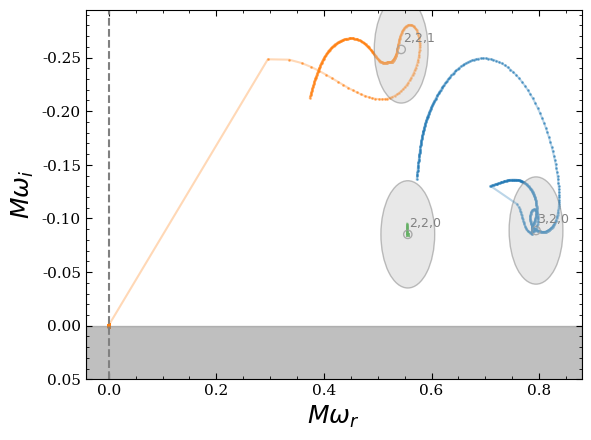

In [7]:
fig, ax = plt.subplots()

# mode locations to visualize on the plot
predicted_qnms = mode_list(['2.2.0', '2.2.1', '3.2.0'], Mf, af)

plot_omega_free(result, ax)
plot_predicted_qnms(ax, predicted_qnms)

### Case 2: Fixed QNMs (fixed frequencies)

Here we assume that the $2{,}2{,}0, 2{,}2{,}1$ and $3{,}3{,}0$ modes are present, so we use a fit model including these three modes and fix their frequencies according to GR with the help of the `qnm` package.
We will use $N_f = 0$, meaning that we do not include additional free QNMs on top of the three fixed modes.

In [8]:
t0_arr = np.linspace(0, 50, num = 501) # array of starting times to fit for
                                       # t0 = 0 is the peak of the straisn
qnm_fixed_list = mode_list(['2.2.0', '2.2.1', '3.2.0'],
                                   Mf, af) # list of QNMs with fixed frequencies in the fit model
run_string_prefix = f"SXS{SXSnum}_lm_{l}.{m}" # prefix of pickle file for saving the results
N_free = 0 # number of free modes to use

# fitter object
fitter = QNMFitVaryingStartingTime(
                            h, t0_arr, N_free = N_free,
                            qnm_fixed_list = qnm_fixed_list, load_pickle = True,
                            run_string_prefix = run_string_prefix)

In [9]:
fitter.do_fits()

Runname: SXS0305_lm_2.2, fitting with the following modes: 2.2.0, 2.2.1, 3.2.0. Status:   0%|          | 0/501…

In [10]:
result = fitter.result_full
popt_full = result.popt_full

We plot the amplitude and phase of the fixed modes, as a function of $t_0$

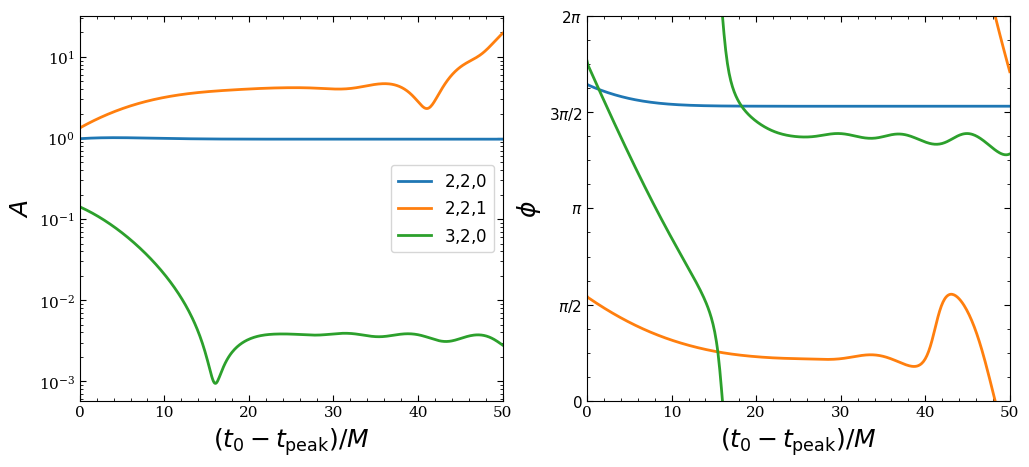

In [11]:
fig, axs = plt.subplots(1, 2, figsize = (12, 5))
plot_amplitudes(result, fixed_modes = qnm_fixed_list, ax = axs[0])
plot_phases(result, fixed_modes = qnm_fixed_list, ax = axs[1], legend = False)